# Test Adam Chatbot

### Archi langgraph

In [9]:
from typing import TypedDict
from langgraph.graph import END, START, StateGraph


class InputState(TypedDict):
    string_value: str
    numeric_value: int

def modify_state(input: InputState):
    input["string_value"] += "a"
    input["numeric_value"] += 1
    return input

def tool_calling_router(input: InputState):
    if input["string_value"] == "question":
        return "simple_question_on_topic"
    elif input["string_value"] == "generate_MCQ":
        return "generate_MCQ_on_topic"
    elif input["string_value"] == "generate_QA":
        return "generate_QA_on_topic"
    elif input["string_value"] == "question_on_chatbot":
        return "question_on_chatbot"
    elif input["string_value"] == "request_not_on_topic":
        return "request_not_on_topic"
    else:
        return "__end__"

def answer_pedagogicaly(input: InputState):
    return 

def generate_MCQ_on_topic(input: InputState):
    return

def generate_QA_on_topic(input: InputState):
    return

def answer_question_on_chatbot(input: InputState):
    return

def request_not_on_topic(input: InputState):
    return

def rag_for_simple_question(input: InputState):
    return

def rag_for_mcq(input: InputState):
    return

def rag_for_qa(input: InputState):
    return

def generate_comments(input: InputState):
    return



In [11]:
graph = StateGraph(InputState)

graph.add_node("tool_calling_router", tool_calling_router)

graph.add_node("RAG_for_simple_question", rag_for_simple_question)
graph.add_node("answer_pedagogicaly", answer_pedagogicaly)

graph.add_node("RAG_for_MCQ", rag_for_mcq)
graph.add_node("generate_MCQ_on_topic", generate_MCQ_on_topic)
graph.add_node("generate_comments_on_MCQ", generate_comments)

graph.add_node("RAG_for_Q&A", rag_for_qa)
graph.add_node("generate_Q&A_on_topic", generate_QA_on_topic)
graph.add_node("generate_comments_on_Q&A", generate_comments)

graph.add_node("question_on_chatbot", answer_question_on_chatbot)

graph.add_node("request_not_on_topic", request_not_on_topic)


graph.add_edge(START, "tool_calling_router")
graph.add_conditional_edges(
    "tool_calling_router", tool_calling_router, {"RAG_for_simple_question": "RAG_for_simple_question", 
                                                 "RAG_for_MCQ": "RAG_for_MCQ", 
                                                 "RAG_for_Q&A": "RAG_for_Q&A", 
                                                 "question_on_chatbot": "question_on_chatbot", 
                                                 "request_not_on_topic": "request_not_on_topic"})
graph.add_edge("RAG_for_simple_question", "answer_pedagogicaly")
graph.add_edge("answer_pedagogicaly", END)
graph.add_edge("RAG_for_MCQ", "generate_MCQ_on_topic")
graph.add_edge("generate_MCQ_on_topic", "generate_comments_on_MCQ")
graph.add_edge("generate_comments_on_MCQ", END)
graph.add_edge("RAG_for_Q&A", "generate_Q&A_on_topic")
graph.add_edge("generate_Q&A_on_topic", "generate_comments_on_Q&A")
graph.add_edge("generate_comments_on_Q&A", END)
graph.add_edge("question_on_chatbot", END)
graph.add_edge("request_not_on_topic", END)

graph.set_entry_point("tool_calling_router")

runnable = graph.compile()

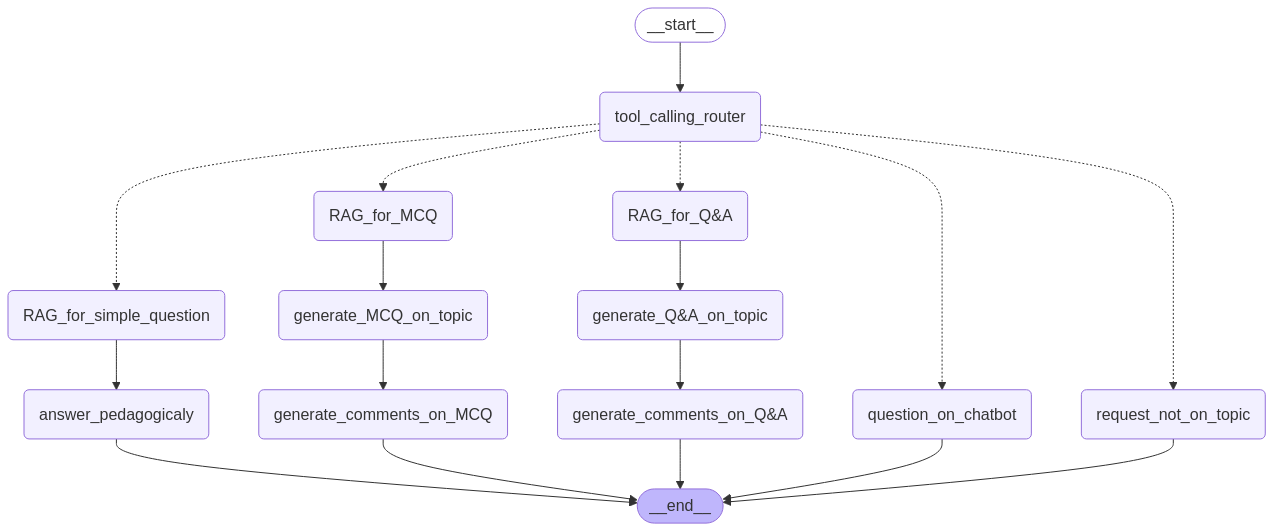

In [12]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        runnable.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)